In [384]:
%matplotlib inline

import numpy as np
import pandas as pd
from collections import OrderedDict
import matplotlib.pyplot as plt
from datetime import timedelta

In [385]:
#folder = "3.14/origin/"
#folder = "3.14/hpcc/"
#folder = "3.19_100G/"
folder = "3.29_40G/"
starttime = 0
dt = 0.09

In [386]:
def read_out_tr(dir, file):
    col = ["events", "time", "from_node", "to_node", "pkt_type", "pkt_size", "flags", "fid", "src_addr", "dst_addr", "seq_num", "pkt_id"]
    df = pd.read_csv(dir+file, sep = ' ', header = None)
    df.columns = col
    return df

In [387]:
def get_receive_packets(df, src_addr):
    df_out = df.loc[df["events"].isin(["r"])]
    df_out = df_out.loc[df_out["pkt_type"].isin(["tcp"])]
    df_out = df_out.loc[df_out["dst_addr"].isin([5.0, 5.1, 5.2, 5.3])]
    df_out = df_out.loc[df_out["to_node"].isin([5])]
    df_out = df_out.loc[df_out["src_addr"].isin(src_addr)]
    return df_out

In [388]:
#raw_data = read_out_tr(folder, "HRCC.tr")
#raw_data = read_out_tr(folder, "AFQ10.tr")
raw_data = read_out_tr(folder, "AFQ100.tr")
#raw_data = read_out_tr(folder, "AFQ1000.tr")
#raw_data = read_out_tr(folder, "DropTail.tr")
#raw_data = read_out_tr(folder, "out.tr")

r_event_in_dst_0 = get_receive_packets(raw_data, [0.0, 0.1, 0.2, 0.3])
r_event_in_dst_1 = get_receive_packets(raw_data, [1.0, 1.1, 1.2, 1.3])
r_event_in_dst_2 = get_receive_packets(raw_data, [2.0, 2.1, 2.2, 2.3])
r_event_in_dst_3 = get_receive_packets(raw_data, [3.0, 3.1, 3.2, 3.3])

In [389]:
#raw_data = read_out_tr(folder, "HRCC_one_flow.tr")
#r_event_in_dst_0 = get_receive_packets(raw_data, [0.0, 0.1, 0.2, 0.3])

In [390]:
r_event_in_dst_1

,events,time,from_node,to_node,pkt_type,pkt_size,flags,fid,src_addr,dst_addr,seq_num,pkt_id
21017,r,0.001510,4,5,tcp,40,-------,1,1.0,5.1,0,3485
21281,r,0.001528,4,5,tcp,1040,-------,1,1.0,5.1,1,3527
21293,r,0.001529,4,5,tcp,1040,-------,1,1.0,5.1,2,3528
21553,r,0.001546,4,5,tcp,1040,-------,1,1.0,5.1,3,3570
21565,r,0.001547,4,5,tcp,1040,-------,1,1.0,5.1,4,3571
21577,r,0.001548,4,5,tcp,1040,-------,1,1.0,5.1,5,3573
21589,r,0.001549,4,5,tcp,1040,-------,1,1.0,5.1,6,3574
21845,r,0.001565,4,5,tcp,1040,-------,1,1.0,5.1,7,3616
21857,r,0.001566,4,5,tcp,1040,-------,1,1.0,5.1,8,3617
21869,r,0.001567,4,5,tcp,1040,-------,1,1.0,5.1,9,3619


In [391]:
r_event_in_dst_0['ts'] = r_event_in_dst_0['time'].apply(lambda x: pd.Timedelta(x,unit='s'))
r_event_in_dst_1['ts'] = r_event_in_dst_1['time'].apply(lambda x: pd.Timedelta(x,unit='s'))
r_event_in_dst_2['ts'] = r_event_in_dst_2['time'].apply(lambda x: pd.Timedelta(x,unit='s'))
r_event_in_dst_3['ts'] = r_event_in_dst_3['time'].apply(lambda x: pd.Timedelta(x,unit='s'))

In [392]:
#r_event_in_dst_0['ts'] = r_event_in_dst_0['time'].apply(lambda x: pd.Timedelta(x,unit='s'))

In [393]:
#pkt_size_series = pd.Series(r_event_in_dst_1['pkt_size'], index=r_event_in_dst['ts'])

In [394]:
# H       hourly frequency
# T, min  minutely frequency
# S       secondly frequency
# L, ms   milliseonds
# U, us   microseconds
# N       nanoseconds
microseconds = 90
shortTh_0 = r_event_in_dst_0[['ts', 'pkt_size']].resample(str(microseconds) + 'U', on='ts').sum()
# GB
shortTh_0['throughtput'] = shortTh_0['pkt_size'] * 8 / (microseconds * 1e-6) / 1000 / 1000 / 1000


shortTh_1 = r_event_in_dst_1[['ts', 'pkt_size']].resample(str(microseconds) + 'U', on='ts').sum()
shortTh_1['throughtput'] = shortTh_1['pkt_size'] * 8 / (microseconds * 1e-6) / 1000 / 1000 / 1000


shortTh_2 = r_event_in_dst_2[['ts', 'pkt_size']].resample(str(microseconds) + 'U', on='ts').sum()
shortTh_2['throughtput'] = shortTh_2['pkt_size'] * 8 / (microseconds * 1e-6) / 1000 / 1000 / 1000


shortTh_3 = r_event_in_dst_3[['ts', 'pkt_size']].resample(str(microseconds) + 'U', on='ts').sum()
shortTh_3['throughtput'] = shortTh_3['pkt_size'] * 8 / (microseconds * 1e-6) / 1000 / 1000 / 1000

shortTh_0.head()

,pkt_size,throughtput
ts,,
00:00:00.000016,61400,5.457778
00:00:00.000106,112320,9.984000
00:00:00.000196,112320,9.984000
00:00:00.000286,113360,10.076444
00:00:00.000376,112320,9.984000


In [395]:
#microseconds = 12
#shortTh_0 = r_event_in_dst_0[['ts', 'pkt_size']].resample(str(microseconds) + 'U', on='ts').sum()
# GB
#shortTh_0['throughtput'] = shortTh_0['pkt_size'] * 8 / (microseconds * 1e-6) / 1000 / 1000 / 1000

In [396]:
shortTh_1.head()

,pkt_size,throughtput
ts,,
00:00:00.001510,28120,2.499556
00:00:00.001600,53040,4.714667
00:00:00.001690,57200,5.084444
00:00:00.001780,57200,5.084444
00:00:00.001870,54080,4.807111


In [397]:
res_0 = shortTh_0[['throughtput']].unstack()['throughtput'].T
res_0.index = res_0.index / timedelta(seconds=1)

res_1 = shortTh_1[['throughtput']].unstack()['throughtput'].T
res_1.index = res_1.index / timedelta(seconds=1)

res_2 = shortTh_2[['throughtput']].unstack()['throughtput'].T
res_2.index = res_2.index / timedelta(seconds=1)

res_3 = shortTh_3[['throughtput']].unstack()['throughtput'].T
res_3.index = res_3.index / timedelta(seconds=1)



In [398]:
#res_0 = shortTh_0[['throughtput']].unstack()['throughtput'].T
#res_0.index = res_0.index / timedelta(seconds=1)
res_1

ts
0.00151    2.499556
0.00160    4.714667
0.00169    5.084444
0.00178    5.084444
0.00187    4.807111
0.00196    4.992000
0.00205    5.176889
0.00214    4.992000
0.00223    4.992000
0.00232    4.899556
0.00241    5.269333
0.00250    4.622222
0.00259    5.084444
0.00268    5.176889
0.00277    4.899556
0.00286    4.899556
0.00295    5.084444
0.00304    4.067556
0.00313    3.512889
0.00322    3.328000
0.00331    3.235556
0.00340    3.235556
0.00349    3.420444
0.00358    3.512889
0.00367    3.235556
0.00376    3.235556
0.00385    3.235556
0.00394    3.605333
0.00403    3.328000
0.00412    3.235556
             ...   
0.00646    3.235556
0.00655    3.235556
0.00664    3.420444
0.00673    3.512889
0.00682    3.235556
0.00691    3.235556
0.00700    3.235556
0.00709    3.420444
0.00718    3.512889
0.00727    3.235556
0.00736    3.235556
0.00745    3.235556
0.00754    5.176889
0.00763    4.899556
0.00772    4.992000
0.00781    4.992000
0.00790    5.176889
0.00799    4.807111
0.00808    5.0844

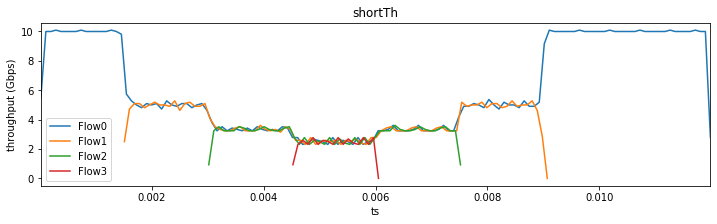

In [399]:
plt.xlabel('time')
plt.ylabel('throughput (Gbps)')
plt.title("ShortTh in real time")

res_0.plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow0')
res_1.plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow1')
res_2.plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow2')
res_3.plot(kind='line', legend=True, title='shortTh', figsize=(12,3), label = 'Flow3')


plt.show()

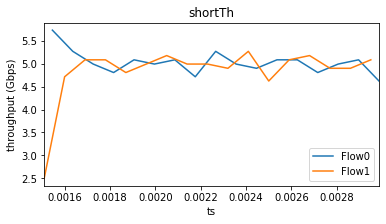

In [400]:
# 2 flow interval

plt.xlabel('time')
plt.ylabel('throughput (Gbps)')
plt.title("ShortTh in real time")

res_0[0.0015:0.003].plot(kind='line', legend=True, title='shortTh', figsize=(6,3), label = 'Flow0')
res_1[0.0015:0.003].plot(kind='line', legend=True, title='shortTh', figsize=(6,3), label = 'Flow1')


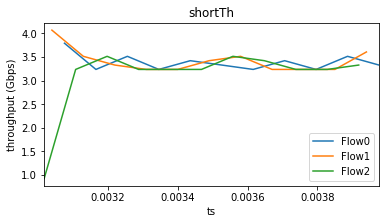

In [401]:
# 3 flow interval

plt.xlabel('time')
plt.ylabel('throughput (Gbps)')
plt.title("ShortTh in real time")

res_0[0.003:0.004].plot(kind='line', legend=True, title='shortTh', figsize=(6,3), label = 'Flow0')
res_1[0.003:0.004].plot(kind='line', legend=True, title='shortTh', figsize=(6,3), label = 'Flow1')
res_2[0.003:0.004].plot(kind='line', legend=True, title='shortTh', figsize=(6,3), label = 'Flow2')


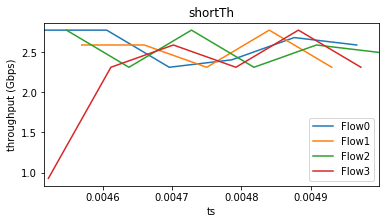

In [402]:
# 4 flow interval

plt.xlabel('time')
plt.ylabel('throughput (Gbps)')
plt.title("ShortTh in real time")

res_0[0.0045:0.005].plot(kind='line', legend=True, title='shortTh', figsize=(6,3), label = 'Flow0')
res_1[0.0045:0.005].plot(kind='line', legend=True, title='shortTh', figsize=(6,3), label = 'Flow1')
res_2[0.0045:0.005].plot(kind='line', legend=True, title='shortTh', figsize=(6,3), label = 'Flow2')
res_3[0.0045:0.005].plot(kind='line', legend=True, title='shortTh', figsize=(6,3), label = 'Flow3')
